In [2]:
import pandas as pd
import numpy as np
%pip install seaborn
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
wave1 = pd.read_csv("Wave1_train.csv")
wave1

,resp_id,WFH_PRE,Job_Clerical or administrative support,"Job_Manufacturing, construction, maintenance, or farming","Job_Professional, managerial, or technical",Job_Sales or service,Workload_increased,Workload_decreased,Increased_productivity,Decreased_productivity,hhveh_harm,age,gender,Number_bedrooms,Race_white,Gradutae_degree,High_income(LessThan_100K),More_income(LMoreThan_35K),ProEnvironment
0,11,0,0,0,0,0,1,0,1,0,2,44,1,5,1,0,0,0,1
1,29,1,0,0,1,0,0,0,0,1,1,39,1,2,1,1,0,1,1
2,30,0,0,0,1,0,0,0,0,1,4,49,0,4,1,0,0,1,1
3,31,1,0,0,1,0,0,0,0,1,1,27,1,1,1,1,0,1,1
4,34,1,0,0,1,0,0,1,0,0,0,32,0,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,9313,0,0,0,0,1,0,0,0,0,2,52,1,3,1,0,0,1,0
1639,9316,0,0,0,0,1,0,0,0,0,2,65,0,3,1,0,0,0,1
1640,9322,0,0,0,0,1,1,0,1,0,2,47,0,3,1,0,0,1,1
1641,9323,0,0,0,0,1,0,1,0,0,4,59,1,1,1,0,0,1,1


In [4]:
wave2 = pd.read_csv("Wave2_train.csv")
wave2

,resp_id,wfh_expect,Job_Clerical or administrative support,"Job_Manufacturing, construction, maintenance, or farming","Job_Professional, managerial, or technical",Job_Sales or service,Workload_increased,Workload_decreased,Increased_productivity,Decreased_productivity,hhveh_harm,age,gender,Number_bedrooms,Race_white,Gradutae_degree,High_income(LessThan_100K),More_income(LMoreThan_35K)
0,1177,Yes,0,0,1,0,0,0,1,0,2,58,1,3,0,1,0,1
1,1188,Yes,0,0,1,0,0,0,1,0,1,66,0,2,1,0,0,0
2,1189,Yes,0,0,0,0,0,0,0,0,0,24,1,3,1,0,1,0
3,1194,Yes,0,0,1,0,0,0,0,0,1,31,1,3,1,1,0,1
4,1202,Yes,0,0,0,0,0,0,0,0,0,23,0,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,9316,No,0,0,0,1,0,0,0,0,2,65,0,3,1,0,0,0
1364,9319,Yes,0,0,0,0,0,0,0,0,2,67,1,3,1,0,0,1
1365,9322,No,0,0,0,1,1,0,1,0,2,47,0,3,1,0,0,1
1366,9323,No,0,0,0,1,0,1,0,0,4,59,1,1,1,0,0,1


# Wave One Workload

In [24]:
w1SalesWorkInc = wave1[(wave1["Job_Sales or service"] == 1) & (wave1["Workload_increased"] == 1)]
len(w1SalesWorkInc)

116

In [18]:
w1SalesWorkDec = wave1[(wave1["Job_Sales or service"] == 1) & (wave1["Workload_decreased"] == 1)]
len(w1SalesWorkDec)

118

In [17]:
w1AdminWorkInc = wave1[(wave1["Job_Clerical or administrative support"] == 1) & (wave1["Workload_increased"] == 1)]
len(w1AdminWorkInc)

28

In [19]:
w1AdminWorkDec = wave1[(wave1["Job_Clerical or administrative support"] == 1) & (wave1["Workload_decreased"] == 1)]
len(w1AdminWorkDec)

21

In [20]:
w1TradeWorkInc = wave1[(wave1["Job_Manufacturing, construction, maintenance, or farming"] == 1) & (wave1["Workload_increased"] == 1)]
len(w1TradeWorkInc)

25

In [21]:
w1TradeWorkDec = wave1[(wave1["Job_Manufacturing, construction, maintenance, or farming"] == 1) & (wave1["Workload_decreased"] == 1)]
len(w1TradeWorkDec)

20

In [22]:
w1ProWorkInc = wave1[(wave1["Job_Professional, managerial, or technical"] == 1) & (wave1["Workload_increased"] == 1)]
len(w1ProWorkInc)

208

In [23]:
w1ProWorkDec = wave1[(wave1["Job_Professional, managerial, or technical"] == 1) & (wave1["Workload_decreased"] == 1)]
len(w1ProWorkDec)

169

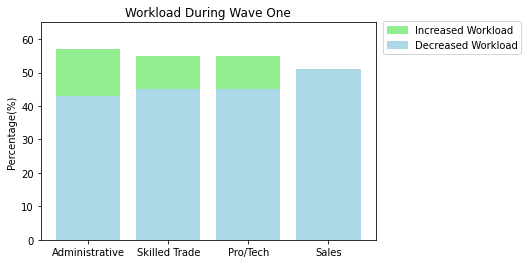

In [76]:
import matplotlib.patches as mpatches
#decrease values for workload
# Admin = 43, Skilled Trade = 45, Pro/Tech = 45, Sales = 51
data = {
    'Administrative': 57,
    'Skilled Trade': 55,
    'Pro/Tech': 55,
    'Sales' : 49,
}

data2 = {
    'Administrative': 43,
    'Skilled Trade': 45,
    'Pro/Tech': 45,
    'Sales' : 51,
}

jobs = list(data.keys())
values = list(data.values())

jobs2 = list(data2.keys())
values2 = list(data2.values())
green_Patch = mpatches.Patch(color='lightgreen', label='Increased Workload')
blue_Patch = mpatches.Patch(color='lightblue', label='Decreased Workload')

plt.ylim(0,65)
plt.bar(range(len(data)), values, tick_label=jobs, color="lightgreen")
plt.bar(range(len(data2)), values2, tick_label=jobs2, color="lightblue")
plt.ylabel("Percentage(%)")
plt.title("Workload During Wave One")

plt.legend(
    bbox_to_anchor=(1.45,1.03),
    loc='upper right',
    frameon=True,
    handles = [green_Patch,blue_Patch]
)

plt.show()

# Wave One Productivity

In [59]:
w1AdminProdInc = wave1[(wave1["Job_Clerical or administrative support"] == 1) & (wave1["Increased_productivity"] == 1)]
len(w1AdminProdInc)

27

In [60]:
w1AdminProdDec = wave1[(wave1["Job_Clerical or administrative support"] == 1) & (wave1["Decreased_productivity"] == 1)]
len(w1AdminProdDec)

26

In [61]:
w1TradeProdInc = wave1[(wave1["Job_Manufacturing, construction, maintenance, or farming"] == 1) & (wave1["Increased_productivity"] == 1)]
len(w1TradeProdInc)

19

In [62]:
w1TradeProdDec = wave1[(wave1["Job_Manufacturing, construction, maintenance, or farming"] == 1) & (wave1["Decreased_productivity"] == 1)]
len(w1TradeProdDec)

22

In [63]:
w1ProProdInc = wave1[(wave1["Job_Professional, managerial, or technical"] == 1) & (wave1["Increased_productivity"] == 1)]
len(w1ProProdInc)

163

In [64]:
w1ProProdDec = wave1[(wave1["Job_Professional, managerial, or technical"] == 1) & (wave1["Decreased_productivity"] == 1)]
len(w1ProProdDec)

202

In [65]:
w1SalesProdInc = wave1[(wave1["Job_Sales or service"] == 1) & (wave1["Increased_productivity"] == 1)]
len(w1SalesProdInc)

73

In [66]:
w1SalesProdDec = wave1[(wave1["Job_Sales or service"] == 1) & (wave1["Decreased_productivity"] == 1)]
len(w1SalesProdDec)

111

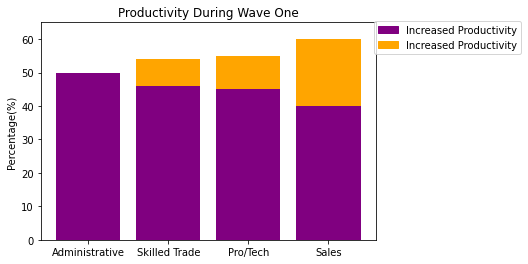

In [75]:
data = {
    'Administrative': 50,
    'Skilled Trade': 46,
    'Pro/Tech': 45,
    'Sales' : 40,
}

data2 = {
    'Administrative': 50,
    'Skilled Trade': 54,
    'Pro/Tech': 55,
    'Sales' : 60,
}

jobs = list(data.keys())
values = list(data.values())

jobs2 = list(data2.keys())
values2 = list(data2.values())

purple_Patch = mpatches.Patch(color='purple', label='Increased Productivity')
orange_Patch = mpatches.Patch(color='orange', label='Decreased Productivity')

plt.ylim(0,65)
plt.bar(range(len(data2)), values2, tick_label=jobs2, color="orange")
plt.bar(range(len(data)), values, tick_label=jobs, color="purple")

plt.ylabel("Percentage(%)")
plt.title("Productivity During Wave One")
plt.legend(
    bbox_to_anchor=(1.45,1.03),
    loc='upper right',
    frameon=True,
    handles = [purple_Patch,orange_Patch]
)

plt.show()

# Wave 2 Workload

In [77]:
w2AdminWorkInc = wave2[(wave2["Job_Clerical or administrative support"] == 1) & (wave2["Workload_increased"] == 1)]
len(w2AdminWorkInc)

24

In [78]:
w2AdminWorkDec = wave2[(wave2["Job_Clerical or administrative support"] == 1) & (wave2["Workload_decreased"] == 1)]
len(w2AdminWorkDec)

16

In [79]:
w2TradeWorkInc = wave2[(wave2["Job_Manufacturing, construction, maintenance, or farming"] == 1) & (wave2["Workload_increased"] == 1)]
len(w2TradeWorkInc)

22

In [80]:
w2TradeWorkDec = wave2[(wave2["Job_Manufacturing, construction, maintenance, or farming"] == 1) & (wave2["Workload_decreased"] == 1)]
len(w2TradeWorkDec)

20

In [81]:
w2ProProdInc = wave2[(wave2["Job_Professional, managerial, or technical"] == 1) & (wave2["Increased_productivity"] == 1)]
len(w2ProProdInc)

125

In [82]:
w2ProProdDec = wave2[(wave2["Job_Professional, managerial, or technical"] == 1) & (wave2["Decreased_productivity"] == 1)]
len(w2ProProdDec)

118

In [83]:
w2SalesProdInc = wave2[(wave2["Job_Sales or service"] == 1) & (wave2["Increased_productivity"] == 1)]
len(w2SalesProdInc)

71

In [84]:
w2SalesProdDec = wave2[(wave2["Job_Sales or service"] == 1) & (wave2["Decreased_productivity"] == 1)]
len(w2SalesProdDec)

108

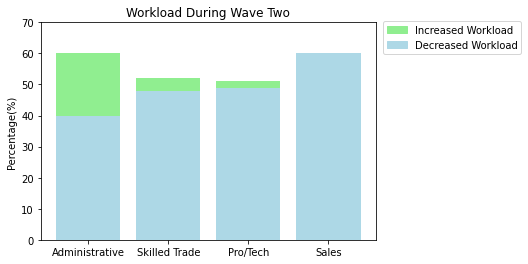

In [94]:
data = {
    'Administrative': 60,
    'Skilled Trade': 52,
    'Pro/Tech': 51,
    'Sales' : 40,
}

data2 = {
    'Administrative': 40,
    'Skilled Trade': 48,
    'Pro/Tech': 49,
    'Sales' : 60,
}

jobs = list(data.keys())
values = list(data.values())

jobs2 = list(data2.keys())
values2 = list(data2.values())
green_Patch = mpatches.Patch(color='lightgreen', label='Increased Workload')
blue_Patch = mpatches.Patch(color='lightblue', label='Decreased Workload')

plt.ylim(0,70)
plt.bar(range(len(data)), values, tick_label=jobs, color="lightgreen")
plt.bar(range(len(data2)), values2, tick_label=jobs2, color="lightblue")
plt.ylabel("Percentage(%)")
plt.title("Workload During Wave Two")

plt.legend(
    bbox_to_anchor=(1.45,1.03),
    loc='upper right',
    frameon=True,
    handles = [green_Patch,blue_Patch]
)

plt.show()

# Wave 2 Productivity

In [85]:
w2AdminProdInc = wave2[(wave2["Job_Clerical or administrative support"] == 1) & (wave2["Increased_productivity"] == 1)]
len(w2AdminProdInc)

21

In [86]:
w2AdminProdDec = wave2[(wave2["Job_Clerical or administrative support"] == 1) & (wave2["Decreased_productivity"] == 1)]
len(w2AdminProdDec)

21

In [87]:
w2TradeProdInc = wave2[(wave2["Job_Manufacturing, construction, maintenance, or farming"] == 1) & (wave2["Increased_productivity"] == 1)]
len(w2TradeProdInc)

18

In [88]:
w2TradeProdDec = wave2[(wave2["Job_Manufacturing, construction, maintenance, or farming"] == 1) & (wave2["Decreased_productivity"] == 1)]
len(w2TradeProdDec)

22

In [89]:
w2ProProdInc = wave2[(wave2["Job_Professional, managerial, or technical"] == 1) & (wave2["Increased_productivity"] == 1)]
len(w2ProProdInc)

125

In [90]:
w2ProProdDec = wave2[(wave2["Job_Professional, managerial, or technical"] == 1) & (wave2["Decreased_productivity"] == 1)]
len(w2ProProdDec)

118

In [91]:
w2SalesProdInc = wave2[(wave2["Job_Sales or service"] == 1) & (wave2["Increased_productivity"] == 1)]
len(w2SalesProdInc)

71

In [92]:
w2SalesProdDec = wave2[(wave2["Job_Sales or service"] == 1) & (wave2["Decreased_productivity"] == 1)]
len(w2SalesProdDec)

108

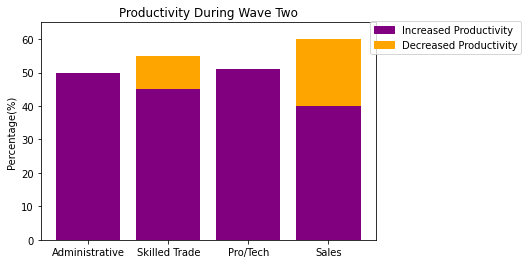

In [97]:
data = {
    'Administrative': 50,
    'Skilled Trade': 45,
    'Pro/Tech': 51,
    'Sales' : 40,
}

data2 = {
    'Administrative': 50,
    'Skilled Trade': 55,
    'Pro/Tech': 49,
    'Sales' : 60,
}

jobs = list(data.keys())
values = list(data.values())

jobs2 = list(data2.keys())
values2 = list(data2.values())

purple_Patch = mpatches.Patch(color='purple', label='Increased Productivity')
orange_Patch = mpatches.Patch(color='orange', label='Decreased Productivity')

plt.ylim(0,65)
plt.bar(range(len(data2)), values2, tick_label=jobs2, color="orange")
plt.bar(range(len(data)), values, tick_label=jobs, color="purple")

plt.ylabel("Percentage(%)")
plt.title("Productivity During Wave Two")
plt.legend(
    bbox_to_anchor=(1.45,1.03),
    loc='upper right',
    frameon=True,
    handles = [purple_Patch,orange_Patch]
)

plt.show()